In [2]:
# 查看当前kernerl下的package
!pip list --format=columns
# 显示cell运行时长
%load_ext klab-autotime

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
arviz                              0.11.4
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                

ModuleNotFoundError: No module named 'klab-autotime'

In [3]:
import matplotlib.pyplot as plt
#用matplotlib.pyplot的subplots命令可以很方便的画对称的子图，
#但是如果要画非对称的子图就需要用GridSpec命令来控制子图的位置和大小
import matplotlib.gridspec as gridspec    # 调整子图位置大小 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
org = pd.read_csv('./credit.csv', index_col=1)

In [5]:
org.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
0,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
0,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
0,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
0,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 熟悉字段:
    SeriousDlqin2yrs：出现90天或更长时间的逾期行为（即定义好坏客户）
    RevolvingUtilizationOfUnsecuredLines：贷款以及信⽤用卡可⽤用额度与总额度比例
    age：借款⼈借款年龄
    NumberOfTime30-59DaysPastDueNotWorse：过去两年内出现35-59天逾期但是没有发展的更坏的次数
    DebtRatio：每⽉月偿还债务,赡养费,⽣生活费⽤用除以⽉月总收⼊
    MonthlyIncome：⽉收⼊
    NumberOfOpenCreditLinesAndLoans：开放式贷款和信贷数量
    NumberOfTimes90DaysLate：借款者有90天或更⾼逾期的次数
    NumberRealEstateLoansOrLines：抵押贷款和房地产贷款数量，包括房屋净值信贷额度
    NumberOfTime60-89DaysPastDueNotWorse：过去两年内出现60-89天逾期但是没有发展的更坏的次数
    NumberOfDependents：家庭中不包括⾃身的家属人数(配偶,⼦女等)

In [7]:
org.shape

(150000, 11)

In [8]:
org.describe(include='all', percentiles=[0.5]).T.round(2)

,count,mean,std,min,50%,max
Unnamed: 0,150000.0,75000.50,43301.41,1.0,75000.50,150000.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.05,249.76,0.0,0.15,50708.0
age,150000.0,52.30,14.77,0.0,52.00,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.42,4.19,0.0,0.00,98.0
DebtRatio,150000.0,353.01,2037.82,0.0,0.37,329664.0
MonthlyIncome,120269.0,6670.22,14384.67,0.0,5400.00,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.45,5.15,0.0,8.00,58.0
NumberOfTimes90DaysLate,150000.0,0.27,4.17,0.0,0.00,98.0
NumberRealEstateLoansOrLines,150000.0,1.02,1.13,0.0,1.00,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.24,4.16,0.0,0.00,98.0


In [10]:
org.drop_duplicates(inplace=True)

In [11]:
org.isnull().sum()

Unnamed: 0                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

<AxesSubplot:>

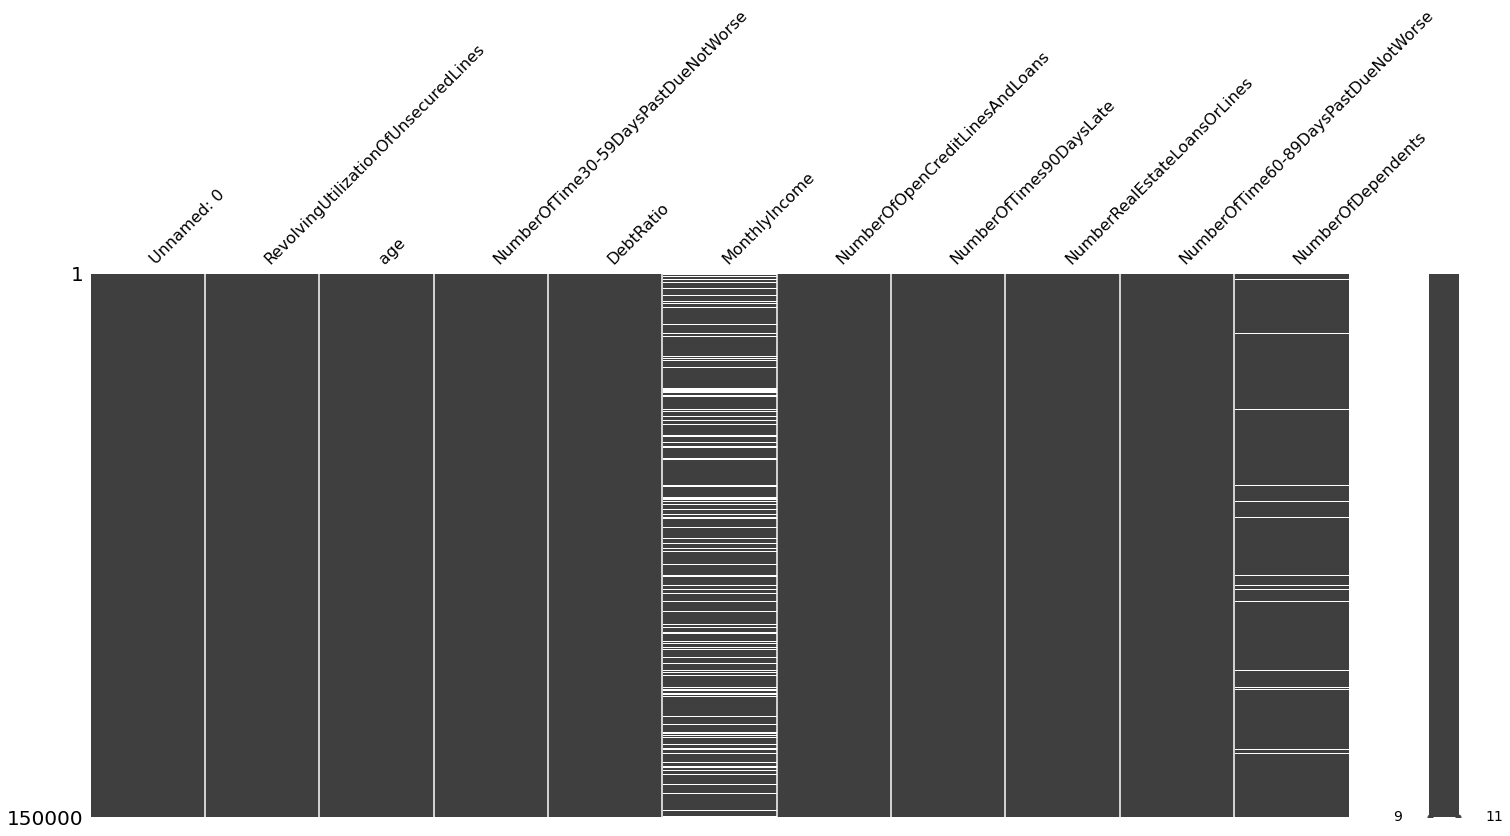

In [14]:
# 处理理缺失值的包,如果没有需安装
import missingno as msno

msno.matrix(org)

月收入（MonthlyIncome） 和 家庭中不包括⾃身的家属人数（NumberOfDependents）有缺失值，且月收入缺失比例较多

In [13]:
!pip install missingno

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


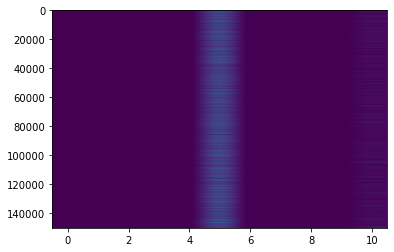

In [15]:
# 换个图形展示
plt.imshow(org.isna(),aspect='auto')

### 对于缺失值处理逻辑：
    1、对于信⽤用评分卡来说，由于所有变量都需要分箱，故这里缺失值作为单独的箱子即可。
    2、对于最后⼀列列NumberOfDependents，缺失值占比只有2.61%，作为单独的箱子信息不不够，故做单⼀值填补，这列表示家庭⼈口数，有右偏的倾向，且属于计数的数据，故使用中位数填补。
    3、这里没必要进行多重插补，下面的多重插补只是为了让大家熟悉此操作。

    下面再做⼀个简单算法填补的演示，并不具有代表性。
    MonthlyIncome 的缺失比例约为19.8%，这里我们基于【个人的收入有较大的可能性和其自身的其他个人特征有关联】这样的假设，使用随机森林算法进行缺失值填补。

训练完成
预测缺失值完成
                  Unnamed: 0  RevolvingUtilizationOfUnsecuredLines  age  \
SeriousDlqin2yrs                                                          
1                          1                              0.766127   45   
0                          2                              0.957151   40   
0                          3                              0.658180   38   
0                          4                              0.233810   30   
0                          5                              0.907239   49   

                  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
SeriousDlqin2yrs                                                    
1                                                    2   0.802982   
0                                                    0   0.121876   
0                                                    1   0.085113   
0                                                    0   0.036050   
0                                              

<AxesSubplot:>

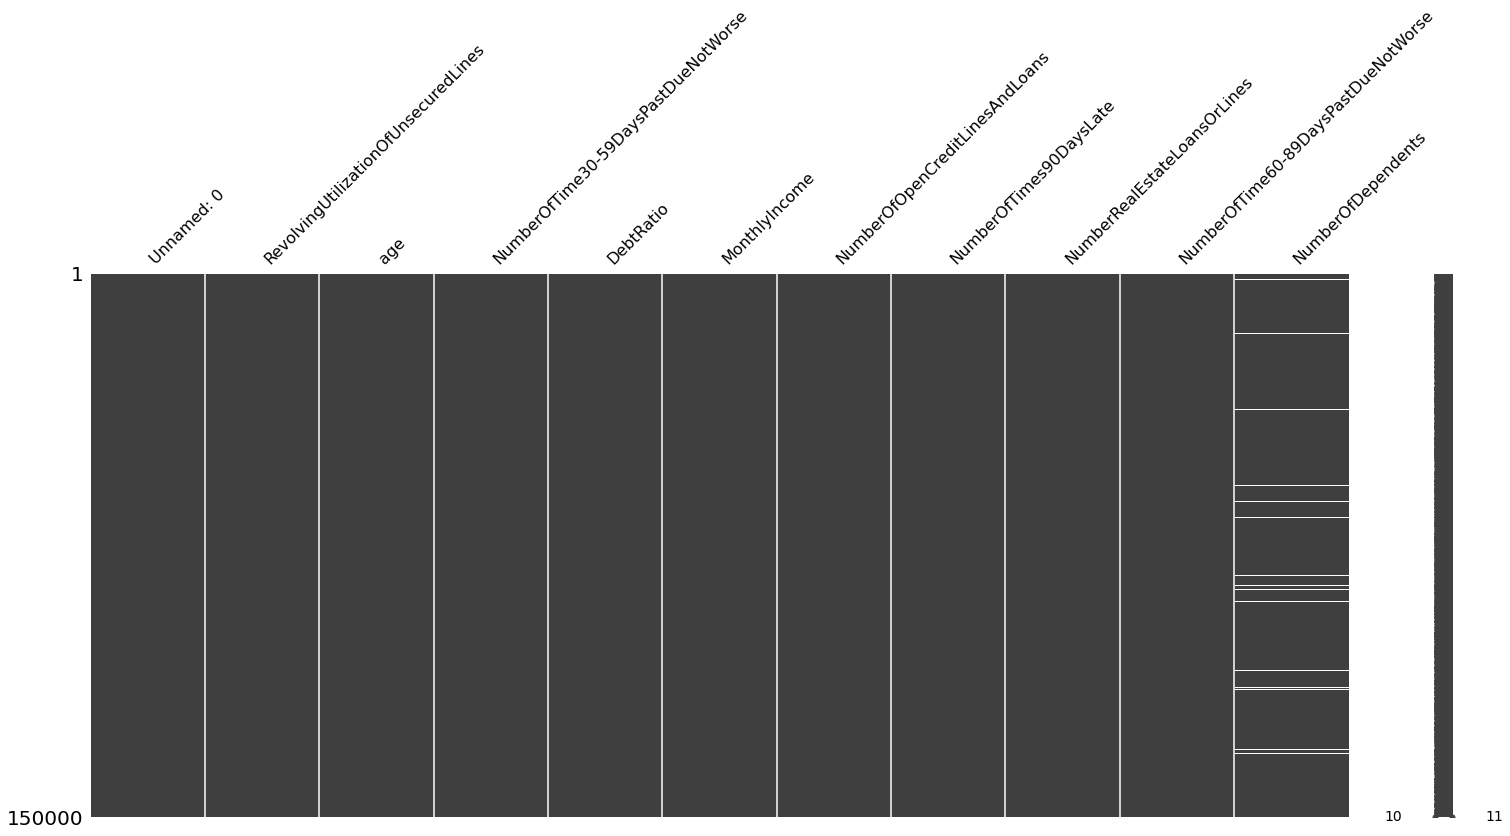

In [16]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing(data,to_fill):
    df = data.copy()
    columns = [*org.columns]
    columns.remove(to_fill)
    
    # 移除有缺失值的列 和 作为标签的列，但因为标签列已经当做index了,所以这里不用删除了
    columns.remove("NumberOfDependents")
    #columns.remove("SeriousDlqin2yrs")
    
    X = df.loc[:, columns]
    y = df.loc[:, to_fill]
    #x = int(x)
    #y = int(y)
    X_train = X.loc[df[to_fill].notnull()]
    X_pred = X.loc[df[to_fill].isnull()]
    y_train = y.loc[df[to_fill].notnull()]
    
    # RF支持并行处理【实现方式是n_jobs参数，此参数要和cpu内核数一致，多了无意义，n_jobs=-1，使用全部内核】
    model = RandomForestRegressor(random_state=10,
                                n_estimators=100,
                                max_depth=3,
                                n_jobs=-1)
    model.fit(X_train,y_train)
    print("训练完成")
    pred = model.predict(X_pred).round()
    df.loc[df[to_fill].isnull(), to_fill] = pred
    print("预测缺失值完成")
    print(df.head())
    return df
    
daik = fill_missing(org, "MonthlyIncome")
daik = pd.DataFrame(daik)
print(daik.info())
msno.matrix(daik)

NumberOfDependents 变量量缺失值⽐比较少，就直接删除

In [17]:
daik.dropna(inplace=True)

In [18]:
print(daik.age.value_counts().sort_index())

daik = daik.loc[daik.age>0]

print(daik.age.value_counts().sort_index())

0        1
21     152
22     396
23     599
24     760
      ... 
99       5
101      3
102      3
103      3
107      1
Name: age, Length: 84, dtype: int64
21     152
22     396
23     599
24     760
25     909
      ... 
99       5
101      3
102      3
103      3
107      1
Name: age, Length: 83, dtype: int64


<AxesSubplot:>

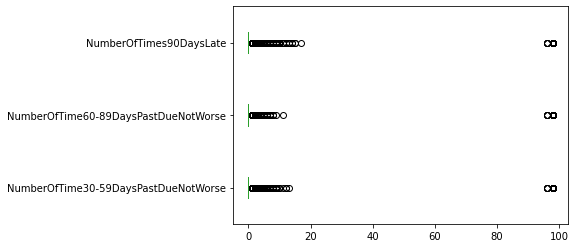

In [19]:
columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']

daik[columns].plot.box(vert = False)

In [20]:
for i in columns:
    daik = daik.loc[daik[i] < 90]

<AxesSubplot:>

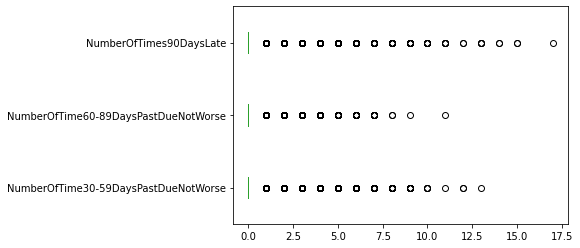

In [21]:
daik[columns].plot.box(vert = False)

In [22]:
daik.index.value_counts()

0    136125
1      9712
Name: SeriousDlqin2yrs, dtype: int64

Text(0, 0.5, '% of Condition of Loans')

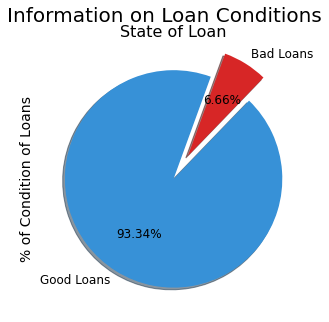

In [23]:
plt.figure(figsize=(10,5))
colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

daik.index.value_counts().plot.pie(explode=[0,0.25], \
autopct='%1.2f%%', shadow=True, colors=colors,\
labels=labels, fontsize=12, startangle=70)

plt.title('State of Loan', fontsize=16)
plt.ylabel('% of Condition of Loans', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age')

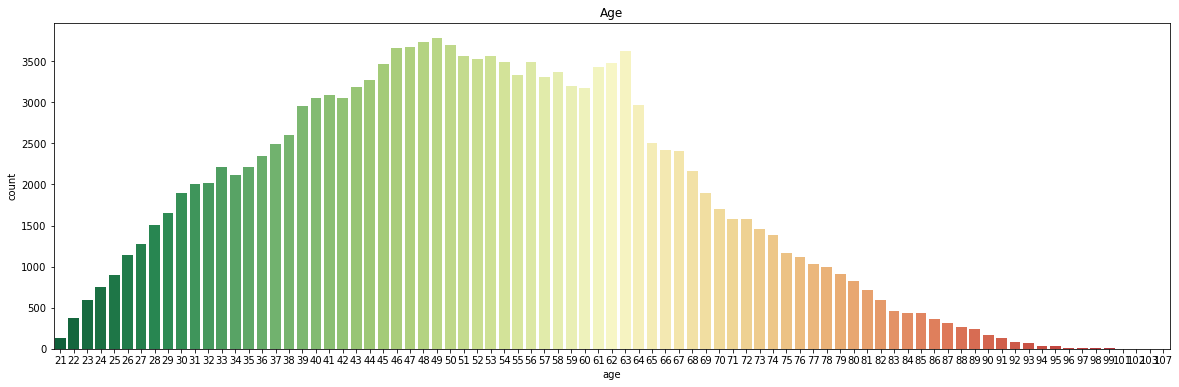

In [24]:
plt.figure(figsize=(20,6))
sns.countplot("age", data=daik, palette='RdYlGn_r')
plt.title('Age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MonthlyIncome vs SeriousDlqin2yrs=0')

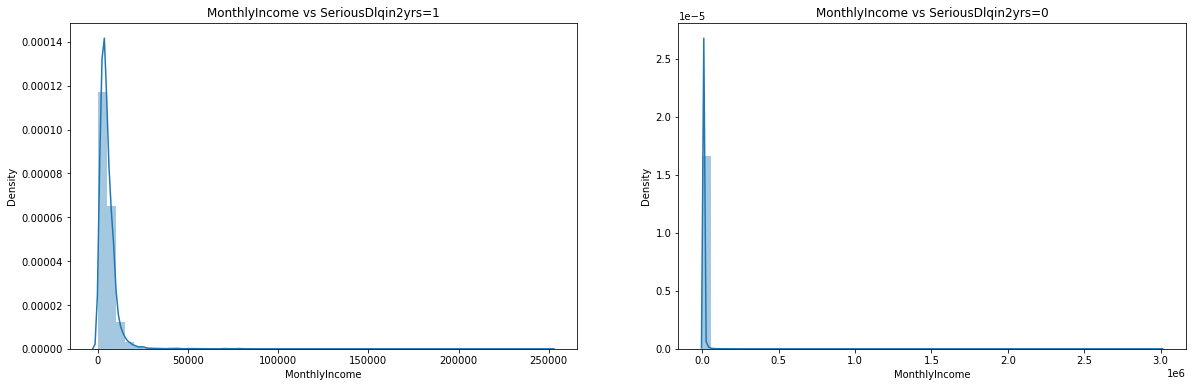

In [25]:
f, ax=plt.subplots(1,2,figsize=(20,6))
sns.distplot(daik[daik.index==1].MonthlyIncome,ax=ax[0])
ax[0].set_title('MonthlyIncome vs SeriousDlqin2yrs=1')

sns.distplot(daik[daik.index==0].MonthlyIncome,ax=ax[1])
ax[1].set_title('MonthlyIncome vs SeriousDlqin2yrs=0')

[Text(1, -1.0, '−1.0'),
 Text(1, -0.5, '−0.5'),
 Text(1, 0.0, '0.0'),
 Text(1, 0.5, '0.5'),
 Text(1, 1.0, '1.0')]

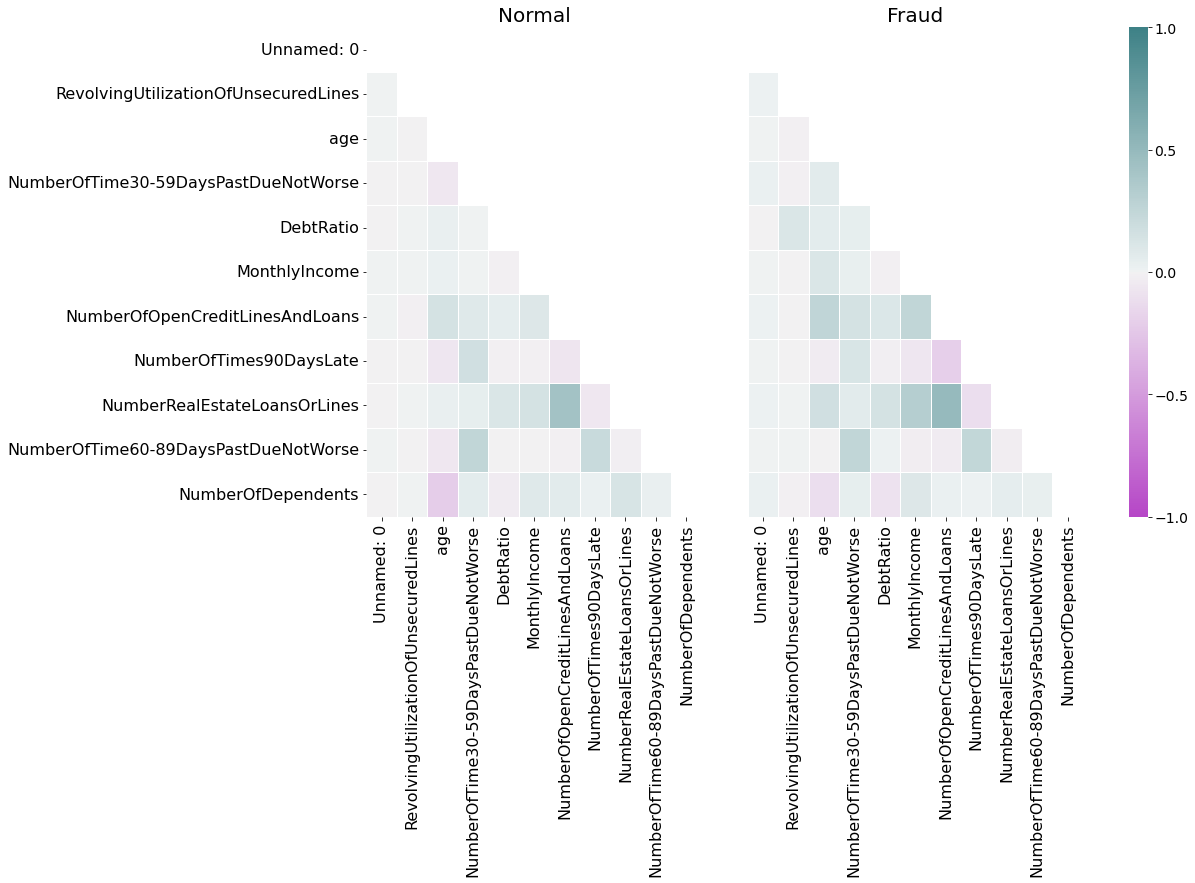

In [26]:
Xfraud = daik.loc[daik.index == 1]      # update Xfraud & XnonFraud with cleaned data
XnonFraud = daik.loc[daik.index == 0]

# 正常
correlationNonFraud = XnonFraud.loc[:, daik.columns].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True
grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))
cmap = sns.diverging_palette(300, 200, as_cmap=True)

ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
                cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16)
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16)
ax1.set_title('Normal', size = 20)

# 欺诈
correlationFraud = Xfraud.loc[:, daik.columns].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
                  ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
                  cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16)
ax2.set_title('Fraud', size = 20)

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14)

In [27]:
daik.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
0,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
0,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
0,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
0,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [29]:
daik.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
daik['SeriousDlqin2yrs'] = daik.index
daik.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [ ]:
sns.pairplot(daik)

KeyboardInterrupt: 